In [1]:
import os

os.chdir("C:\\Users\\Nino\\fds project")
os.getcwd()

'C:\\Users\\Nino\\fds project'

In [12]:
conda install -c conda-forge missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Nino\Anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    missingno-0.4.2            |             py_0          12 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          12 KB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/noarch::missingno-0.4.2-py_0




missingno-0.4.2      | 12 KB     |            |   0% 
missingno-0.4.2      | 12 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [161]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.impute import SimpleImputer

In [31]:
train_df = pd.read_csv("application_train.csv")
train_df.shape

(307511, 122)

In [5]:
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test_df = pd.read_csv("application_test.csv")
test_df.shape

(48744, 121)

In [37]:
train_df.loc[205]['NAME_TYPE_SUITE']

'Spouse, partner'

In [40]:
train_df["FLOORSMIN_AVG"].unique()

array([0.125 , 0.3333,    nan, 0.375 , 0.7083, 0.0417, 0.2083, 0.4167,
       0.2917, 0.45  , 0.    , 0.1417, 0.5   , 0.625 , 0.0833, 0.1667,
       0.3471, 0.5208, 0.1042, 0.6667, 0.5417, 0.25  , 0.1108, 0.3142,
       0.5833, 0.2638, 0.1525, 0.2292, 0.3229, 0.3125, 0.4375, 0.5167,
       0.4792, 0.2383, 0.2708, 0.025 , 0.0625, 0.4858, 0.1458, 0.4442,
       1.    , 0.6458, 0.8333, 0.1875, 0.3667, 0.6042, 0.2167, 0.4721,
       0.2321, 0.3542, 0.2221, 0.9583, 0.3854, 0.2417, 0.0208, 0.0554,
       0.2846, 0.4104, 0.2   , 0.4583, 0.3192, 0.9167, 0.3417, 0.1804,
       0.75  , 0.0971, 0.3054, 0.1821, 0.2608, 0.0138, 0.1367, 0.3958,
       0.3083, 0.1942, 0.5554, 0.6108, 0.4025, 0.4708, 0.3896, 0.4271,
       0.7708, 0.1146, 0.3888, 0.1833, 0.2558, 0.1279, 0.6583, 0.245 ,
       0.8054, 0.3833, 0.4304, 0.0312, 0.1962, 0.4896, 0.7917, 0.5104,
       0.3271, 0.2408, 0.2358, 0.7204, 0.3438, 0.1758, 0.6317, 0.5275,
       0.2667, 0.1333, 0.5625, 0.1388, 0.3238, 0.4283, 0.2604, 0.5083,
      

In [9]:
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Missing values

To have a sense of the state of missing values in our dataset, we use missingno matrix.

white horizontal lines in the matrix are rows with missing values

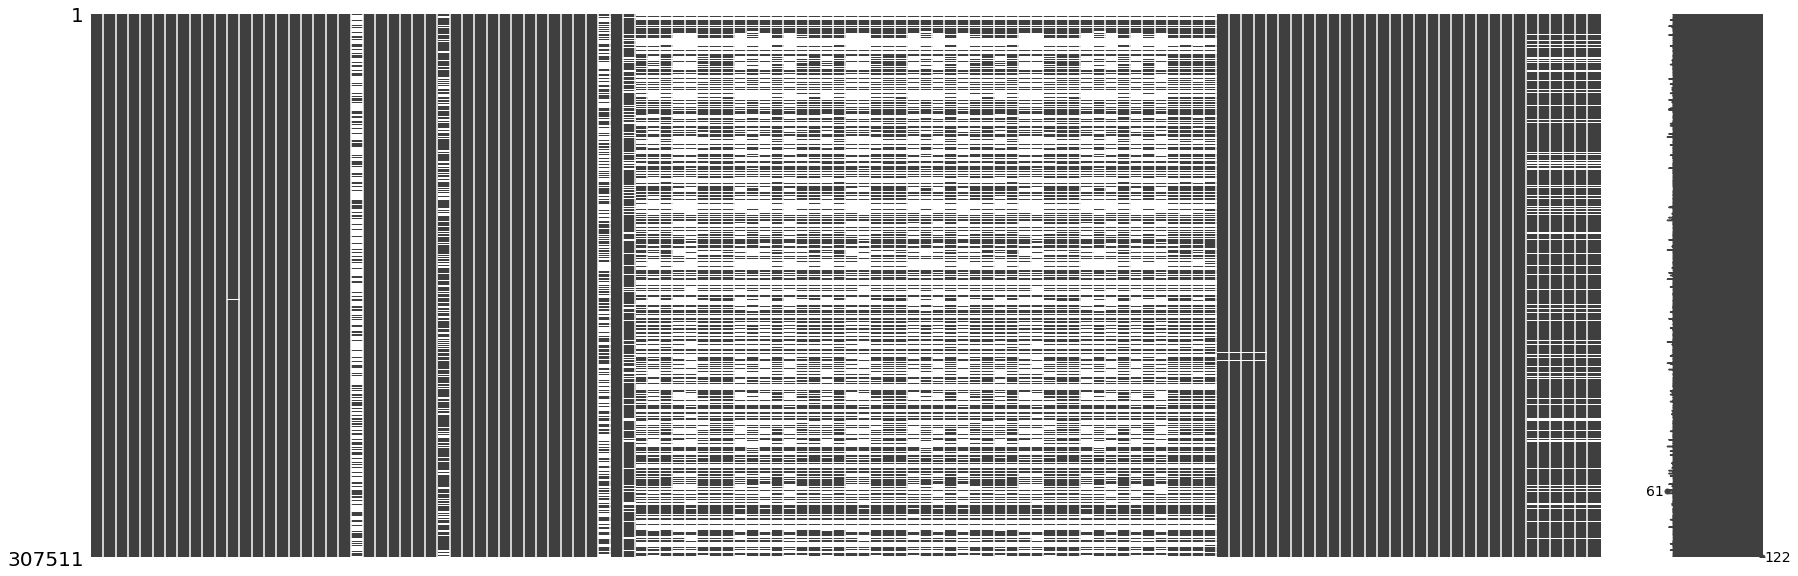

In [7]:
missingno.matrix(train_df, figsize = (30,10))

As we can see, in some columns there is a high percentage of missing values. we should think of a strategy to deal with missing values

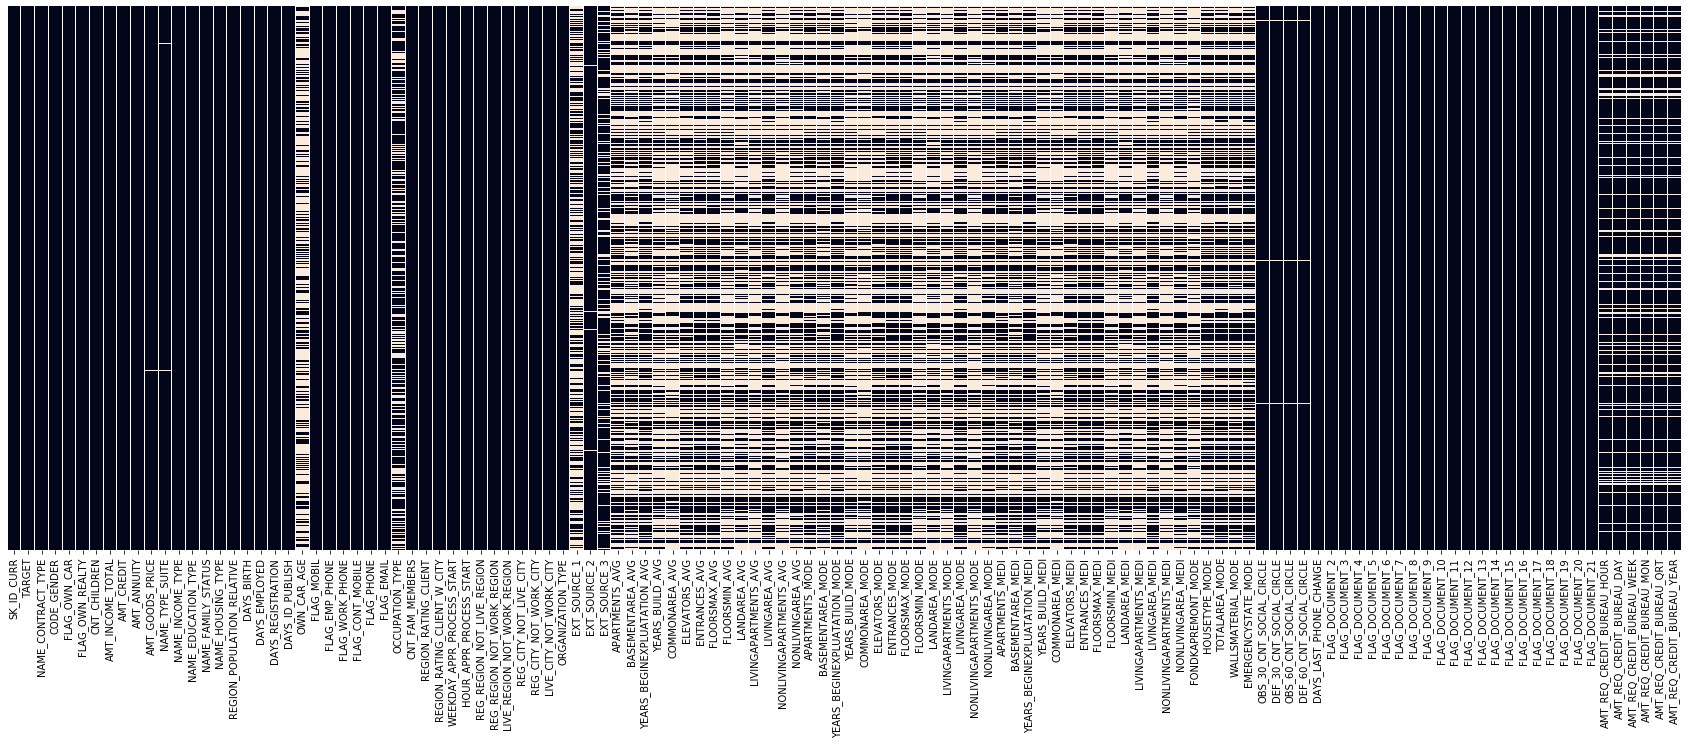

In [33]:
#get the plot of missing value  with heatmap, we can choose to keep one of them at last
plt.figure(figsize=(30, 10))
sns.heatmap(train_df.isnull(), yticklabels= False , cbar = False)

In [29]:
(train_df.isnull().sum()/train_df.shape[0]).sort_values(ascending = False)

COMMONAREA_MEDI                0.698723
COMMONAREA_AVG                 0.698723
COMMONAREA_MODE                0.698723
NONLIVINGAPARTMENTS_MODE       0.694330
NONLIVINGAPARTMENTS_MEDI       0.694330
NONLIVINGAPARTMENTS_AVG        0.694330
FONDKAPREMONT_MODE             0.683862
LIVINGAPARTMENTS_MEDI          0.683550
LIVINGAPARTMENTS_MODE          0.683550
LIVINGAPARTMENTS_AVG           0.683550
FLOORSMIN_MEDI                 0.678486
FLOORSMIN_MODE                 0.678486
FLOORSMIN_AVG                  0.678486
YEARS_BUILD_MEDI               0.664978
YEARS_BUILD_AVG                0.664978
YEARS_BUILD_MODE               0.664978
OWN_CAR_AGE                    0.659908
LANDAREA_MODE                  0.593767
LANDAREA_AVG                   0.593767
LANDAREA_MEDI                  0.593767
BASEMENTAREA_MEDI              0.585160
BASEMENTAREA_AVG               0.585160
BASEMENTAREA_MODE              0.585160
EXT_SOURCE_1                   0.563811
NONLIVINGAREA_MEDI             0.551792


Some columns have almost 70% null values, we can apply different startegies like removing columns with more than 50% null values but in this stage we are not sure how this would effect the result of our classification

In [34]:
#understand about types of our columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [85]:
# Write a function for one hot encoding to handle all categorical features
def one_hot_encoding(df) :
    for col in list(df.columns) :
        if df[col].dtype == 'object' :
            df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
            df = df.drop(columns = col)  #remove the categorical column after hot encoding
    return(df)
    

## preparing other databases

### Feature Engineering- bureau_balance database

In [203]:
bureau_balance = pd.read_csv("bureau_balance.csv")
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [204]:
bureau_balance["STATUS"].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [205]:
# The thing that I can think of for this dataset is to assign a risk factor to each SK_ID_BUREAU for each month 
# based on the STATUS column and then put the mean of them for each SK_ID_BUREAU and the put the mean for each SK_ID_CURR

bureau_balance['STATUS'] = bureau_balance['STATUS'].map({'C' : 0 , '0' : 0 , 'X' : .1 , '1' : 1 , 
                                                      '2' : 2 , '3' : 3 , '4' :4 , '5' : 5})

bureau_balance1 = bureau_balance.groupby('SK_ID_BUREAU', as_index=False)['STATUS'].mean()

In [213]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,0.0
1,5715448,-1,0.0
2,5715448,-2,0.0
3,5715448,-3,0.0
4,5715448,-4,0.0


In [225]:
len(bureau_balance['SK_ID_BUREAU'].unique())

817395

### Feature Engineering- bureau database

In [229]:
bureau = pd.read_csv("bureau.csv")
bureau= bureau.merge(bureau_balance1, on = 'SK_ID_BUREAU', how = 'left')
bureau['STATUS'] = bureau['STATUS'].fillna(0) # we had lots of null values in status column
#I decided to fill nulls with 0 because when there isn't any information about the possible risk
#maybe we can conclude there isn't any risk in that specefic field
bureau.head(100)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,STATUS
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.000,NaN,0.0,Consumer credit,-131,NaN,0.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.000,NaN,0.0,Credit card,-20,NaN,0.0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN,0.0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN,0.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.500,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN,0.0
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.000,0,180000.00,71017.380,108982.620,0.0,Credit card,-31,NaN,0.0
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.000,0,42103.80,42103.800,0.000,0.0,Consumer credit,-22,NaN,0.0
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.000,0,76878.45,0.000,0.000,0.0,Consumer credit,-1710,NaN,0.0
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.000,0,103007.70,0.000,0.000,0.0,Consumer credit,-840,NaN,0.0
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.000,0,4500.00,0.000,0.000,0.0,Credit card,-690,NaN,0.0


In [227]:
print(bureau["STATUS"].isnull().sum())
len(bureau['SK_ID_BUREAU'].unique())

942074


1716428

In [91]:
# Handling categorical features with one Hot Encoding
bureau = one_hot_encoding(bureau)

In [92]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,...,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,...,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [147]:
# getting the mean of features related to previous loans of a customer.
#we also can add min, max and sum of these features
bureau_mean = bureau.groupby('SK_ID_CURR').mean()
privious_loans = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count() #number of previous loans for each customer
privious_loans = privious_loans.rename(columns = {"SK_ID_CURR" : "SK_ID_CURR", "SK_ID_BUREAU" : "PLoan_num"})
bureau_mean= bureau_mean.merge(previous_loans, on = 'SK_ID_CURR', how = 'left')
bureau_mean.drop(columns = "SK_ID_BUREAU" )
bureau_mean.head()


# IMP ) Don't forget to fill null values of this dataset with 0 when merging this dataset with train+test

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,PLoan_num
0,100001,5896633.000,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,100002,6153272.125,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,100003,5885878.500,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,100004,6829133.500,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,100005,6735201.000,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [108]:
# Defining new variables that may be useful
# A useful variable could be how often did the customer take loans in past? in a regular basis or for a short period
# Each can have different interpretation

frequency = bureau[['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT']].groupby(by=['SK_ID_CURR'])
#frequency['DAYS_CREDIT'] = frequency['DAYS_CREDIT']* -1
frequency1 =  frequency.apply(lambda x: x.sort_values(['DAYS_CREDIT'], ascending=False)).reset_index(drop=True)
frequency1['Loan_FRQ'] = frequency1.groupby(by=['SK_ID_CURR'])['DAYS_CREDIT'].diff()

In [149]:
bureau[bureau["SK_ID_CURR"] == 100001]

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
248484,100001,5896630,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,...,0,0,0,0,0,0,0,0,0,0
248485,100001,5896631,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,...,0,0,0,0,0,0,0,0,0,0
248486,100001,5896632,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,...,0,0,0,0,0,0,0,0,0,0
248487,100001,5896633,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,...,0,0,0,0,0,0,0,0,0,0
248488,100001,5896634,-559,0,902.0,NaN,NaN,0,337680.0,113166.0,...,0,0,0,0,0,0,0,0,0,0
248489,100001,5896635,-49,0,1778.0,NaN,NaN,0,378000.0,373239.0,...,0,0,0,0,0,0,0,0,0,0
248490,100001,5896636,-320,0,411.0,NaN,NaN,0,168345.0,110281.5,...,0,0,0,0,0,0,0,0,0,0


Now need to find mean of Loan_FRQ for each SK_ID_CURR. First, I drop null values(beacause when we calculate diff, the diff value for the first bureau of each SK_ID_CURR is NAN ) and then calculate mean values for each SK_ID_CURR

In [148]:
frequency1 = frequency1.dropna(subset = ['Loan_FRQ'])
frequency1 = frequency1.groupby('SK_ID_CURR', as_index=False)['Loan_FRQ'].mean()




# Now we should merge frequency1 and bureau_mean database
bureau_mean= bureau_mean.merge(frequency1, on = 'SK_ID_CURR', how = 'left')

#we have null values in Loan_FRQ column if there was just 1 previous loan
#fill null values of this column with the value  of DAYS_CREDIT column
bureau_mean.Loan_FRQ = np.where(bureau_mean.Loan_FRQ.isnull(), bureau_mean.DAYS_CREDIT, bureau_mean.Loan_FRQ)

bureau_mean["Loan_FRQ"] = bureau_mean["Loan_FRQ"].abs()

bureau_mean.drop(columns = "SK_ID_BUREAU" )

bureau_mean.head(10)


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,PLoan_num,Loan_FRQ
0,100001,5.896633e+06,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,253.833333
1,100002,6.153272e+06,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,190.571429
2,100003,5.885878e+06,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,660.000000
3,100004,6.829134e+06,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,918.000000
4,100005,6.735201e+06,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,155.500000
5,100007,5.987200e+06,-1149.000000,0.0,-783.000000,-783.000000,0.000,0.0,146250.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1149.000000
6,100008,6.491433e+06,-757.333333,0.0,-391.333333,-909.000000,0.000,0.0,156148.500000,80019.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,509.500000
7,100009,5.651005e+06,-1271.500000,0.0,-794.937500,-1108.500000,0.000,0.0,266711.750000,76953.535714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,155.470588
8,100010,5.576631e+06,-1939.500000,0.0,-119.500000,-1138.000000,NaN,0.0,495000.000000,174003.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1603.000000
9,100011,5.741084e+06,-1773.000000,0.0,-1293.250000,-1463.250000,5073.615,0.0,108807.075000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,399.666667


In [150]:
#check which columns have null values
bureau_mean.isna().any()

SK_ID_CURR                                                  False
SK_ID_BUREAU                                                False
DAYS_CREDIT                                                 False
CREDIT_DAY_OVERDUE                                          False
DAYS_CREDIT_ENDDATE                                          True
DAYS_ENDDATE_FACT                                            True
AMT_CREDIT_MAX_OVERDUE                                       True
CNT_CREDIT_PROLONG                                          False
AMT_CREDIT_SUM                                               True
AMT_CREDIT_SUM_DEBT                                          True
AMT_CREDIT_SUM_LIMIT                                         True
AMT_CREDIT_SUM_OVERDUE                                      False
DAYS_CREDIT_UPDATE                                          False
AMT_ANNUITY                                                  True
CREDIT_ACTIVE_Active                                        False
CREDIT_ACT

In [155]:
bureau_mean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,305811.0,2.780473e+05,102849.568343,1.000010e+05,1.888785e+05,2.778950e+05,3.671845e+05,4.562550e+05
SK_ID_BUREAU,305811.0,5.923271e+06,527500.472352,5.000002e+06,5.466406e+06,5.921346e+06,6.381642e+06,6.843454e+06
DAYS_CREDIT,305811.0,-1.083802e+03,558.441124,-2.922000e+03,-1.431000e+03,-1.052500e+03,-6.703693e+02,0.000000e+00
CREDIT_DAY_OVERDUE,305811.0,9.659264e-01,24.957209,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.776000e+03
DAYS_CREDIT_ENDDATE,303226.0,6.624208e+02,3282.359178,-4.187500e+04,-6.975250e+02,-1.317889e+02,6.130000e+02,3.119800e+04
DAYS_ENDDATE_FACT,268155.0,-9.670183e+02,531.158694,-8.376500e+03,-1.288592e+03,-9.264000e+02,-5.736667e+02,0.000000e+00
AMT_CREDIT_MAX_OVERDUE,212971.0,5.004934e+03,285681.900244,0.000000e+00,0.000000e+00,0.000000e+00,2.063745e+03,1.159872e+08
CNT_CREDIT_PROLONG,305811.0,7.010185e-03,0.062334,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
AMT_CREDIT_SUM,305809.0,3.807398e+05,879286.461085,0.000000e+00,1.039616e+05,1.972972e+05,3.978647e+05,1.980723e+08
AMT_CREDIT_SUM_DEBT,297439.0,1.616341e+05,536767.654508,-1.083615e+06,0.000000e+00,4.476038e+04,1.436004e+05,5.175000e+07


In [163]:
# filling null values with mean of the column
#? Do u think it's a good startegy? I'm not sure about it

imputer = SimpleImputer(strategy = "mean")
imputer.fit(bureau_mean)
bureau_mean.loc[:] = imputer.transform(bureau_mean)

In [164]:
bureau_mean.head(10)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,PLoan_num,Loan_FRQ
0,100001.0,5.896633e+06,-735.000000,0.0,82.428571,-825.500000,5004.93376,0.0,207623.571429,85240.928571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,253.833333
1,100002.0,6.153272e+06,-874.000000,0.0,-349.000000,-697.500000,1681.02900,0.0,108131.945625,49156.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,190.571429
2,100003.0,5.885878e+06,-1400.750000,0.0,-544.500000,-1097.333333,0.00000,0.0,254350.125000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,660.000000
3,100004.0,6.829134e+06,-867.000000,0.0,-488.500000,-532.500000,0.00000,0.0,94518.900000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,918.000000
4,100005.0,6.735201e+06,-190.666667,0.0,439.333333,-123.000000,0.00000,0.0,219042.000000,189469.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,155.500000
5,100007.0,5.987200e+06,-1149.000000,0.0,-783.000000,-783.000000,0.00000,0.0,146250.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1149.000000
6,100008.0,6.491433e+06,-757.333333,0.0,-391.333333,-909.000000,0.00000,0.0,156148.500000,80019.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,509.500000
7,100009.0,5.651005e+06,-1271.500000,0.0,-794.937500,-1108.500000,0.00000,0.0,266711.750000,76953.535714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,155.470588
8,100010.0,5.576631e+06,-1939.500000,0.0,-119.500000,-1138.000000,5004.93376,0.0,495000.000000,174003.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1603.000000
9,100011.0,5.741084e+06,-1773.000000,0.0,-1293.250000,-1463.250000,5073.61500,0.0,108807.075000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,399.666667
